
VERSION 2: Adding BFS Search Algorithm

Running BFS Algorithm...
✅ Goal found in 41 steps!


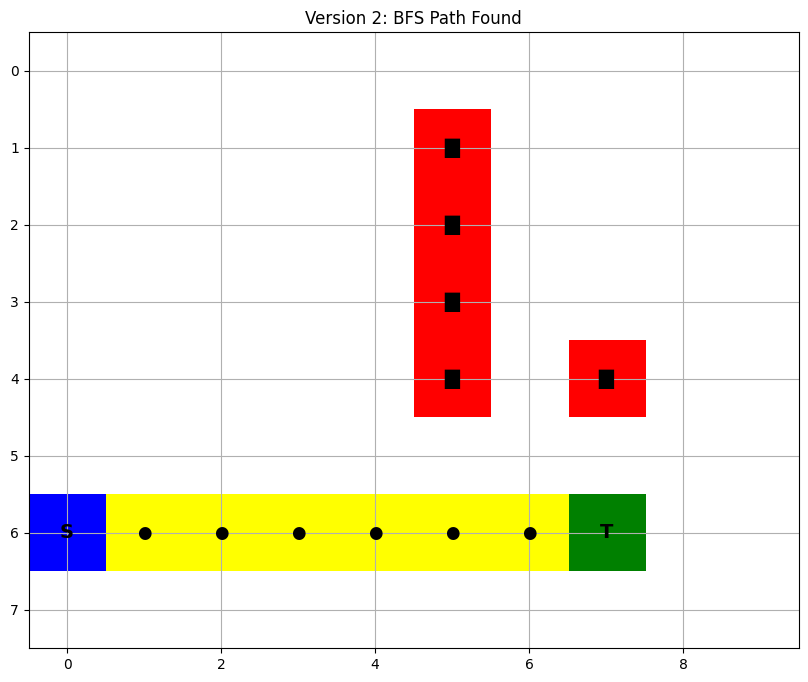


✅ Version 2 Complete: Added BFS algorithm with path reconstruction


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from collections import deque

print("\n" + "=" * 50)
print("=" * 50)

class GridPathfinderV2:
    def __init__(self):
        self.rows = 8
        self.cols = 10
        self.init_grid()
        
    def init_grid(self):
        self.grid = np.zeros((self.rows, self.cols))
        self.start = (6, 0)
        self.target = (6, 7)
        
        walls = [(1, 5), (2, 5), (3, 5), (4, 5), (4, 7)]
        for r, c in walls:
            self.grid[r, c] = -1
            
        self.grid[self.start] = 1
        self.grid[self.target] = 2
    
    def get_neighbors(self, pos):
        """Get valid neighbors in 4 directions (cardinal)"""
        r, c = pos
        directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        
        neighbors = []
        for dr, dc in directions:
            nr, nc = r + dr, c + dc
            if (0 <= nr < self.rows and 0 <= nc < self.cols and 
                self.grid[nr, nc] != -1):
                neighbors.append((nr, nc))
        return neighbors
    
    def bfs(self):
        """BFS implementation"""
        print("\nRunning BFS Algorithm...")
        
        frontier = deque([self.start])
        visited = {self.start}
        parent = {self.start: None}
        steps = 0
        
        while frontier:
            steps += 1
            current = frontier.popleft()
            
            if current == self.target:
                print(f"✅ Goal found in {steps} steps!")
                return self.reconstruct_path(parent)
            
            for neighbor in self.get_neighbors(current):
                if neighbor not in visited:
                    visited.add(neighbor)
                    parent[neighbor] = current
                    frontier.append(neighbor)
        
        print("❌ No path found")
        return None
    
    def reconstruct_path(self, parent):
        """Reconstruct path from start to target"""
        path = []
        current = self.target
        while current is not None:
            path.append(current)
            current = parent[current]
        return path[::-1]
    
    def visualize_path(self, path):
        """Visualize the found path"""
        fig, ax = plt.subplots(figsize=(10, 8))
        
        # Create visualization grid
        viz_grid = self.grid.copy()
        if path:
            for node in path[1:-1]:  # Skip start and target
                viz_grid[node] = 3  # Path
        
        # Setup colors
        colors = ['red', 'white', 'blue', 'green', 'yellow']
        cmap = plt.cm.colors.ListedColormap(colors)
        
        ax.imshow(viz_grid, cmap=cmap, vmin=-1, vmax=3)
        
        # Add labels
        for i in range(self.rows):
            for j in range(self.cols):
                val = int(viz_grid[i, j])
                if val == 1:
                    ax.text(j, i, 'S', ha='center', va='center', fontsize=14, fontweight='bold')
                elif val == 2:
                    ax.text(j, i, 'T', ha='center', va='center', fontsize=14, fontweight='bold')
                elif val == 3:
                    ax.text(j, i, '●', ha='center', va='center', fontsize=12)
                elif val == -1:
                    ax.text(j, i, '█', ha='center', va='center', fontsize=14)
        
        ax.set_title("BFS Path Found")
        ax.grid(True)
        plt.show()

v2 = GridPathfinderV2()
path = v2.bfs()
v2.visualize_path(path)
print("\n✅ Version 2 Complete: Added BFS algorithm with path reconstruction")